In [1]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [97]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [98]:
# Carregar os dados de treino e teste
df_train = pd.read_csv("dados_treinamento_1.csv")
df_test = pd.read_csv("dados_teste_1.csv")

In [99]:
# Dados de treino
X_train = df_train.drop(columns=["class"])
y_train = df_train["class"]

# Dados de teste
X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

# Só para garantir que está sendo dividido corretamente:
print('Treinamento:',y_train.value_counts())
print('--------------   ------------------')
print('Teste:',y_test.value_counts())

Treinamento: class
xwin       240
hasgame    240
owin       240
tie         25
Name: count, dtype: int64
--------------   ------------------
Teste: class
owin       60
hasgame    60
xwin       60
tie         7
Name: count, dtype: int64


In [100]:
k = 6
model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

# Train the classifier
model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

In [101]:

y_pred = model.predict(X_test)

mat = confusion_matrix(y_test, y_pred, labels=['hasgame', 'owin', 'tie', 'xwin'])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.7540106951871658
Precisão: 0.7798201667919977
Recall: 0.7767857142857144
F1-Score: 0.7761017628705019


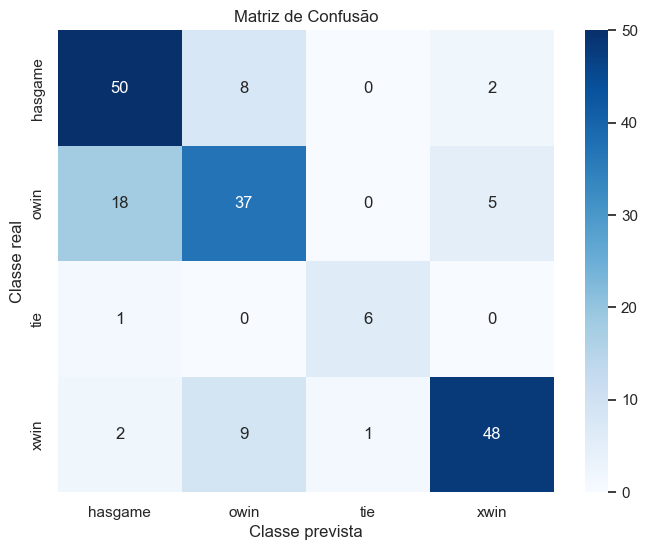

In [102]:
# Criar a matriz de confusão
# Nomes para o eixo
labels = ['hasgame', 'owin', 'tie', 'xwin']

# Plot usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.title('Matriz de Confusão')
plt.show()

<Figure size 1000x600 with 0 Axes>

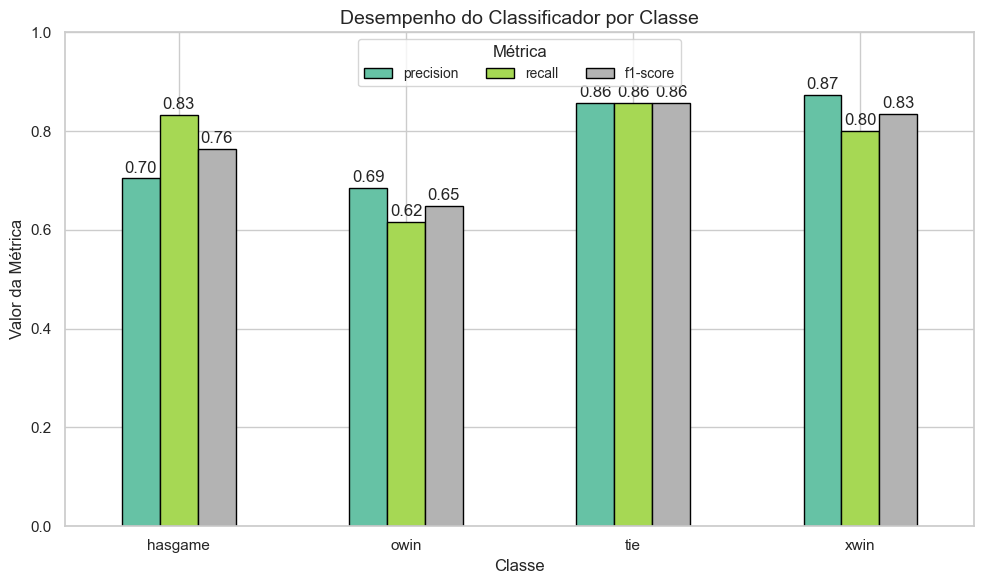

In [103]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
classes = ['hasgame', 'owin', 'tie', 'xwin']
df_filtered = df_report.loc[classes, ['precision', 'recall', 'f1-score']]

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

ax = df_filtered.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='Set2', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# Ajusta elementos visuais
plt.title('Desempenho do Classificador por Classe', fontsize=14)
plt.ylabel('Valor da Métrica')
plt.xlabel('Classe')
plt.xticks(rotation=0)
plt.legend(title='Métrica', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='small')
plt.tight_layout()
plt.show()

In [104]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [105]:
from tabulate import tabulate
import numpy as np

exemplos_teste = [
    {'resp': 'tie', 'value': [0, 1, 1, 1, 1, 0, 0, 0, 1]}, 
    {'resp': 'owin', 'value': [0, 0, 0,1, 1, -1,-1, -1, 1]},  
    {'resp': 'hasgame', 'value': [-1, 1, 1,0, 0, -1,0, 1, 1]}, 
    {'resp': 'xwin', 'value': [1, 0, 0,1, 1, 1, 0, -1, 0]}, 
]


cabecalho = ["Posições", "Classe Real", "Classe Prevista", "Acerto", "hasgame", "owin", "tie", "xwin"]
tabela_resultados = []

for exemplo in exemplos_teste:
    tabuleiro = np.array(exemplo['value']).reshape(1, -1)
    classe_real = exemplo['resp']
    resultado = model.predict(tabuleiro)[0]
    probabilidades = model.predict_proba(tabuleiro)[0]
    acerto = resultado == classe_real

    # Formatando a linha da tabela
    linha = [
        exemplo['value'],
        classe_real,
        resultado,
        "✅" if acerto else "❌",
        *["{:.2f}".format(p) for p in probabilidades]
    ]
    tabela_resultados.append(linha)

print(tabulate(tabela_resultados, headers=cabecalho, tablefmt="fancy_grid"))


╒════════════════════════════════╤═══════════════╤═══════════════════╤══════════╤═══════════╤════════╤═══════╤════════╕
│ Posições                       │ Classe Real   │ Classe Prevista   │ Acerto   │   hasgame │   owin │   tie │   xwin │
╞════════════════════════════════╪═══════════════╪═══════════════════╪══════════╪═══════════╪════════╪═══════╪════════╡
│ [0, 1, 1, 1, 1, 0, 0, 0, 1]    │ tie           │ tie               │ ✅       │      0    │   0.17 │  0.83 │   0    │
├────────────────────────────────┼───────────────┼───────────────────┼──────────┼───────────┼────────┼───────┼────────┤
│ [0, 0, 0, 1, 1, -1, -1, -1, 1] │ owin          │ owin              │ ✅       │      0.17 │   0.5  │  0    │   0.33 │
├────────────────────────────────┼───────────────┼───────────────────┼──────────┼───────────┼────────┼───────┼────────┤
│ [-1, 1, 1, 0, 0, -1, 0, 1, 1]  │ hasgame       │ hasgame           │ ✅       │      0.33 │   0.17 │  0.17 │   0.33 │
├────────────────────────────────┼─────────

C:\Users\gusta\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gusta\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gusta\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gusta\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gusta\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have val

In [106]:
import joblib
import os

# Salve o modelo como .pkl
joblib.dump(model, "modelos/knn.pkl")

print("Modelo salvo com sucesso em 'modelos/knn.pkl'")

Modelo salvo com sucesso em 'modelos/knn.pkl'


In [107]:
# Carregar os dados de treino e teste
df_train = pd.read_csv("dados_treinamento.csv")
df_test = pd.read_csv("dados_teste.csv")

O melhor valor de k é: 6 com acurácia média de: 0.7346


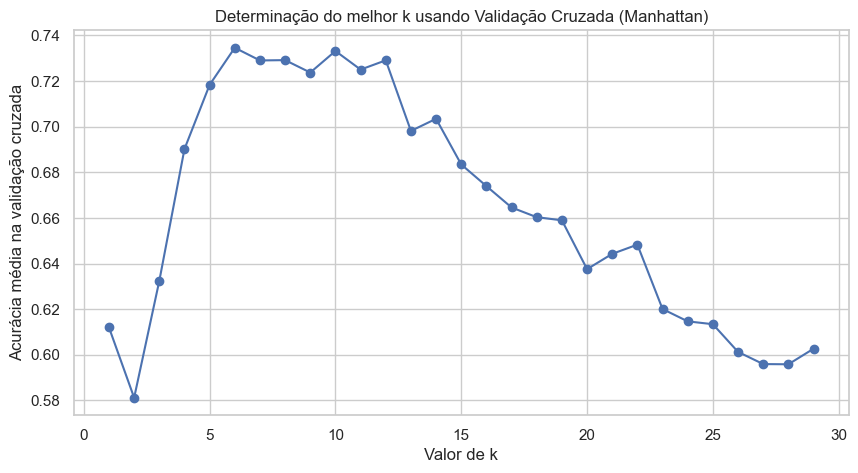

In [108]:
# Avaliar diferentes valores de k
# Dados de treino
X_train = df_train.drop(columns=["class"])
y_train = df_train["class"]

# Dados de teste
X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())

# Encontrar o melhor valor de k
optimal_k = k_range[np.argmax(scores)]
print(f'O melhor valor de k é: {optimal_k} com acurácia média de: {max(scores):.4f}')

# Plotar gráfico de desempenho
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média na validação cruzada')
plt.title('Determinação do melhor k usando Validação Cruzada (Manhattan)')
plt.grid(True)
plt.show()